In [1]:
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)
    
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

from script_emotion_id.data import *

In [2]:
label_df = get_labeling().labels
label_df.describe(include='all')

/home/kostan-v/workspace/engagement-recognition/script_emotion_id/data.py:119: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  reactions.label = reactions.label.astype("category", categories=self.categories)


script_emotion_id participant   stimulus_video label
count               1579        1579             1579  1579
unique                 1         326                6     5
top               Proj-1       15422  CoopKolesomania     4
freq                1579           5              318   504

## Label distribution
**Classes (in Slovak):**
1. nepozerám sa na obsah
2. pozerám sa ale obsah ma nezaujíma
3. obsah ma zaujíma a tvárim sa neutrálne
4. obsah ma zaujíma a tvárim sa pobavene
5. obsah ma zaujíma a tvárim sa negatívne

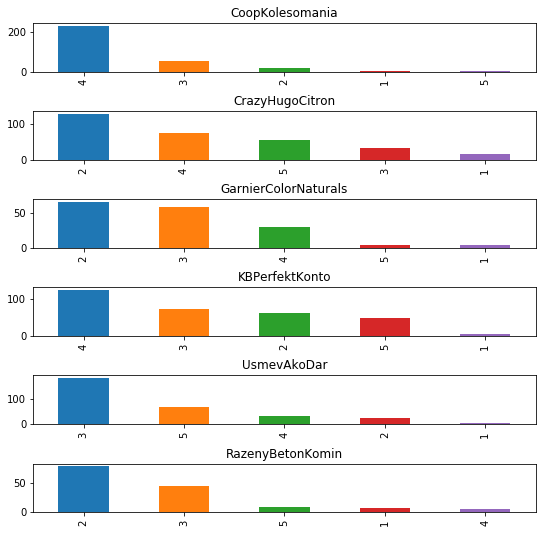

In [22]:
videos = label_df.stimulus_video.unique()

fig, axes = plt.subplots(nrows=len(videos),figsize=(9,9))
plt.subplots_adjust(hspace=0.8)

for video, axis in zip(videos, axes):
    axis.set_title(video)
    label_df[label_df.stimulus_video == video].label.value_counts().plot(ax=axis, kind='bar')
    

In [24]:
df_kb = load_data('KBPerfektKonto')
df_kb_progress = get_progress_mean(df_kb)

In [28]:
df_lengths = df_kb.groupby(level=0).size()

## Clip lengths for KBPerfectKonto stimulus video

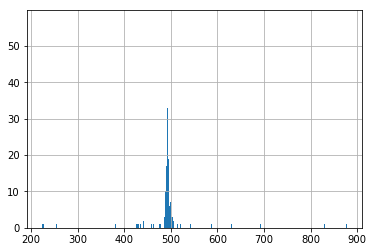

In [29]:
length_range = df_lengths.max() - df_lengths.min()
df_lengths.hist(bins=length_range)

## Mean participant emotion scores for KBPerfectKonto stimulus video

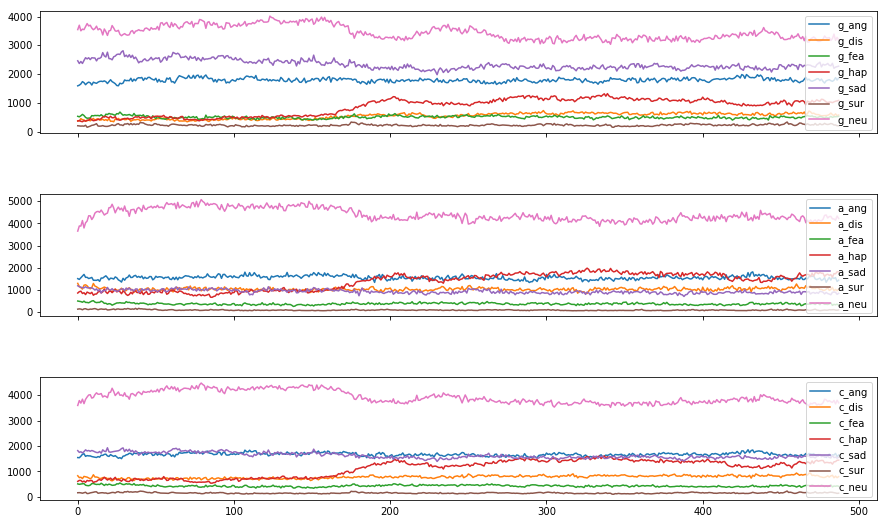

In [26]:
f, axarr = plt.subplots(3, figsize=(15,9), sharex=True)
plt.subplots_adjust(hspace=0.5)
df_kb_progress[['g_ang', 'g_dis', 'g_fea', 'g_hap', 'g_sad', 'g_sur', 'g_neu']].plot(ax=axarr[0])
df_kb_progress[['a_ang', 'a_dis', 'a_fea', 'a_hap', 'a_sad', 'a_sur', 'a_neu']].plot(ax=axarr[1])
df_kb_progress[['c_ang', 'c_dis', 'c_fea', 'c_hap', 'c_sad', 'c_sur', 'c_neu']].plot(ax=axarr[2])

In [30]:
# respondent_idxs = df_kb.index.levels[0]
# respondent_count = len(respondent_idxs)
# cache = None
# for idx in respondent_idxs:
#     respondent = df_kb.xs(idx, level=0)
#     respondent['label'] = label_df[label_df.participant == idx].label
#     cache = idx
#     break
